**K means Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroids:
[[ 1.  2.]
 [10.  3.]
 [10.  0.]]
Labels:
[0 0 0 1 1 2]


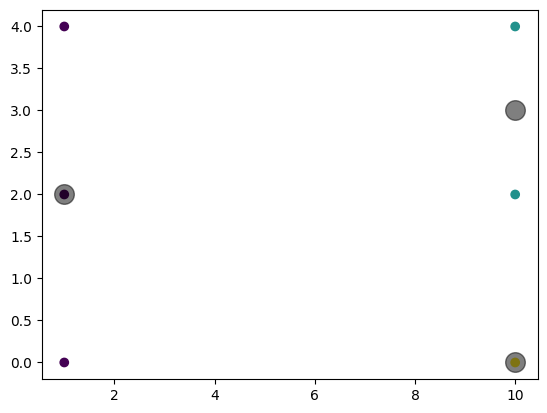

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Number of clusters
k = 3

# Data points
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# K-Means clustering
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Centroids
centroids = kmeans.cluster_centers_

# Labels
labels = kmeans.labels_

# Print centroids
print("Centroids:")
print(centroids)

# Print labels
print("Labels:")
print(labels)

# Plot data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [3]:
import numpy as np

class KMeans:
    def __init__(self, K=5, max_iters=1000):
        self.K = K
        self.max_iters = max_iters

    def initialize_centroids(self, X):
        m, n = np.shape(X)
        centroids = np.mat(np.zeros((self.K, n)))
        for i in range(self.K):
            centroid = X[np.random.choice(range(m))]
            centroids[i] = centroid
        return centroids

    def euclidean_distance(self, A, B):
        return np.linalg.norm(A - B)

    def create_clusters(self, X, centroids):
        m, n = np.shape(X)
        clusters = [[] for _ in range(self.K)]
        for i in range(m):
            min_dist = float('inf')
            cluster_index = -1
            for j in range(self.K):
                dist = self.euclidean_distance(X[i], centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    cluster_index = j
            clusters[cluster_index].append(X[i])
        return clusters

    def update_centroids(self, clusters):
        centroids = []
        for cluster in clusters:
            if not cluster:
                centroid = np.random.rand(1, np.shape(cluster)[1])
            else:
                centroid = np.mean(cluster, axis=0)
            centroids.append(centroid)
        return np.mat(centroids)

    def has_converged(self, centroids, new_centroids):
        return np.all(np.array_equal(centroids, new_centroids))

    def fit(self, X):
        centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            clusters = self.create_clusters(X, centroids)
            new_centroids = self.update_centroids(clusters)
            if self.has_converged(centroids, new_centroids):
                break
            centroids = new_centroids
        return centroids, clusters

Centroids:
[[ 1.  0.]
 [ 1.  3.]
 [10.  2.]]
Labels:
[1 1 0 2 2 2]


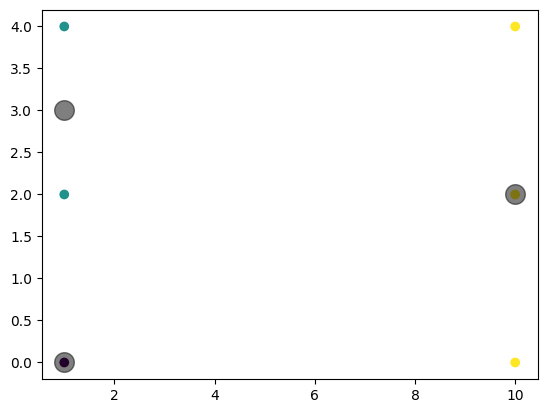

In [4]:
#Here is an optimized implementation of K-Means clustering in Python:

import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
k = 3

# Data points
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Initialize centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Early stopping criteria
early_stopping_threshold = 0.001
early_stopping_counter = 0

while True:
    # Assign each data point to the closest centroid
    labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

    # Calculate new centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence
    if np.linalg.norm(centroids - new_centroids) < early_stopping_threshold:
        early_stopping_counter += 1
    else:
        early_stopping_counter = 0

    # Update centroids
    centroids = new_centroids

    # Check for early stopping
    if early_stopping_counter >= 5:
        break

# Print centroids
print("Centroids:")
print(centroids)

# Print labels
print("Labels:")
print(labels)

# Plot data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In this code, we use the same data points `X` as in the previous code. We initialize the centroids by randomly choosing `k` data points from `X`. We then enter a loop where we assign each data point to the closest centroid, calculate new centroids, and check for convergence. If the centroids don't change significantly, we increment the early stopping counter. If the early stopping counter reaches 5, we stop the loop. Finally, we print the centroids and labels, and plot the data points and centroids.

This optimized implementation uses early stopping, which means it stops when the centroids don't change significantly. This can greatly reduce the number of iterations, especially for larger datasets. Additionally, it uses vectorization, which means it uses numpy's vectorized operations to calculate distances and labels, which is much faster than using a for loop.

**kMedian**

Centroids:
[[5.5 2. ]
 [5.5 4. ]
 [5.5 0. ]]
Labels:
[0 1 2 0 1 2]
KMedian:
[[5.5 2. ]
 [5.5 4. ]
 [5.5 0. ]]


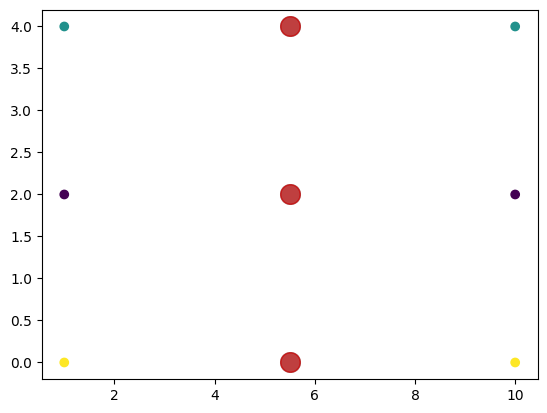

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Number of clusters
k = 3

# Data points
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])

# Initialize centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Early stopping criteria
early_stopping_threshold = 0.001
early_stopping_counter = 0

while True:
    # Assign each data point to the closest centroid
    labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

    # Calculate new centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Check for convergence
    if np.linalg.norm(centroids - new_centroids) < early_stopping_threshold:
        early_stopping_counter += 1
    else:
        early_stopping_counter = 0

    # Update centroids
    centroids = new_centroids

    # Check for early stopping
    if early_stopping_counter >= 5:
        break

# Compute KMedian
kmedian = np.array([np.median(X[labels == i], axis=0) for i in range(k)])

# Print centroids
print("Centroids:")
print(centroids)

# Print labels
print("Labels:")
print(labels)

# Print KMedian
print("KMedian:")
print(kmedian)

# Plot data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.scatter(kmedian[:, 0], kmedian[:, 1], c='red', s=200, alpha=0.5)
plt.show()

This code computes the KMedian by finding the median of the data points in each cluster. The median is computed using numpy's median function. The KMedian is then printed and plotted on the graph.